<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Codigos/PVC_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de Reação-Difusão Estacionária em 2D

Um domínio quadrado $L \times L$ está sujeito à seguinte equação diferencial: $D\nabla^2C_A=k_1C_A $

A condição de contorno é de Dirichlet, com concentrações constantes $C_{A0}$ em todas as bordas laterais. Aqui utilizamos o métodos das diferenças finitas centradas.

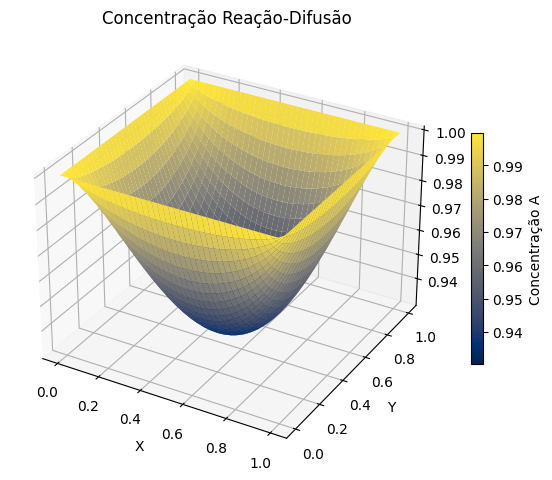

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do Modelo
Da = 1

# Discretização do espaço
n = 41
dx = 1/(n-1)

# Inicializar as Variáveis AC=b
A = np.zeros((n*n,n*n))
C = np.zeros(n*n)
b = np.zeros(n*n)

# Preencher os elementos de A e b diferentes de zero
# Equações dos nós interiores
for i in range(1,n-1):
    for j in range(1,n-1):
        k = i + j*n
        A[k,k-1] = 1
        A[k,k  ] = -(4+Da*dx*dx)
        A[k,k+1] = 1
        A[k,k-n] = 1
        A[k,k+n] = 1
        b[k] = 0

# Equações do Fundo
for k in range(1,n-1):
    A[k,k] = 1
    b[k] = 1

# Equações do Topo
for k in range(n*(n-1)+1, n*n-1):
    A[k,k] = 1
    b[k] = 1

# Equações da Lateral Esquerda
for j in range(1,n-1):
    k = j*n
    A[k,k] = 1
    b[k] = 1

# Equações da Lateral Direita
for j in range(1,n-1):
    k = n*(j+1)-1
    A[k,k] = 1
    b[k] = 1

# Equações das Quinas
# Esquerda Inferior
A[0,0] = 1
b[0] = 1

# Direita Inferior
A[n-1,n-1] = 1
b[n-1] = 1

# Esquerda Superior
A[n*(n-1),n*(n-1)] = 1
b[n*(n-1)] = 1

# Direita Superior
A[n*n-1,n*n-1] = 1
b[n*n-1] = 1

# Resolver o Sistema Linear de n² Equações
C = np.linalg.solve(A,b)

# Extrair as variáveis para plotar
x = np.zeros((n,n))
y = np.zeros((n,n))
Conc = np.zeros((n,n))

for i in range(0,n):
    for j in range(0,n):
        k = i + j*n;
        Conc[i,j] = C[k];
        x[i,j] = i*dx;
        y[i,j] = j*dx;

# Criar figura e eixos tridimensionais
fig = plt.figure(figsize = (7,6))
ax = plt.axes(projection='3d')

# Plotar o gráfico 3D
surf = ax.plot_surface(x, y, Conc, cmap = plt.cm.cividis)

# Criar um mapa de cores
fig.colorbar(surf, shrink=0.5, label='Concentração A')

# Colocar nomes nos eixos
ax.set_title('Concentração Reação-Difusão')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()